In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from methods import super_newton
from oracles import create_log_sum_exp_zero_oracle

# Soft Maximum

$$
\min\limits_{x \in \mathbb{R}^n} f(x) \; = \;
\mu \ln\biggl( \sum\limits_{i = 1}^m \exp\Bigl( \frac{ \langle a_i, x \rangle - b_i }{\mu} \Bigr)\biggr)
\quad \approx \quad
\max\limits_{1 \leq i \leq m} \bigl[ \langle a_i, x \rangle - b_i \bigr],
$$
where $\mu > 0$ is a smoothing parameter; $a_1, \ldots, a_m \in \mathbb{R}^n$ 
and $b \in \mathbb{R}^m$ are given data.

### Parameters

In [3]:
n = 500 # Dimension
m = 1000 # Number of linear functions
mu = 0.05 # Smoothing parameter

### Generate random problem

In [4]:
np.random.seed(3124)

A = np.random.rand(n, m) * 2 - 1
b = np.random.rand(m) * 2 - 1

oracle = create_log_sum_exp_zero_oracle(A.T, b, mu)

f_star = oracle.func(np.zeros(n)) # Optimum is at zero
x_0 = np.ones(n) # Initial point

B = A.dot(A.T) # The matrix for the Euclidean metric
Binv = np.linalg.inv(B)

# Run Methods

In [5]:
eps = 1e-8 # Functional residual tolerance
H_min = 1e-9 # The minimal value of regularization constant

### Super-Universal Newton, $\alpha = 0$

In [6]:
_, msg, history_SN_0 = super_newton(oracle, x_0, 
                                    n_iters=1000, 
                                    H_0=1.0, 
                                    alpha=0.0,
                                    adaptive_search=True, 
                                    B=B, 
                                    Binv=Binv,
                                    f_star=f_star,
                                    eps=eps,
                                    H_min=H_min)
print('Time: %.3f s' % history_SN_0['time'][-1])

Time: 20.283 s


### Super-Universal Newton, $\alpha = \frac{1}{2}$

In [7]:
_, msg, history_SN_12 = super_newton(oracle, x_0, 
                                     n_iters=1000, 
                                     H_0=1.0, 
                                     alpha=1.0 / 2.0,
                                     adaptive_search=True, 
                                     B=B, 
                                     Binv=Binv,
                                     f_star=f_star,
                                     eps=eps,
                                     H_min=H_min)
print('Time: %.3f s' % history_SN_12['time'][-1])

Time: 22.650 s


### Super-Universal Newton, $\alpha = \frac{2}{3}$

In [8]:
_, msg, history_SN_23 = super_newton(oracle, x_0, 
                                     n_iters=1000, 
                                     H_0=1.0, 
                                     alpha=2.0 / 3.0,
                                     adaptive_search=True, 
                                     B=B, 
                                     Binv=Binv,
                                     f_star=f_star,
                                     eps=eps,
                                     H_min=H_min)
print('Time: %.3f s' % history_SN_23['time'][-1])

Time: 22.211 s


### Super-Universal Newton, $\alpha = 1$

In [9]:
_, msg, history_SN_1 = super_newton(oracle, x_0, 
                                    n_iters=1000, 
                                    H_0=1.0, 
                                    alpha=1.0,
                                    adaptive_search=True, 
                                    B=B, 
                                    Binv=Binv,
                                    f_star=f_star,
                                    eps=eps,
                                    H_min=H_min)
print('Time: %.3f s' % history_SN_1['time'][-1])

Time: 21.477 s


# Plot Graphs

### Func. residual vs Iterations

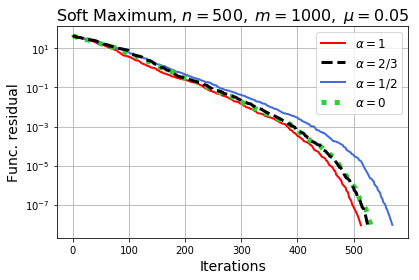

In [10]:
plt.semilogy(np.array(history_SN_1['func']) - f_star, '-', 
             linewidth=2, label=r"$\alpha=1$", color='red')
plt.semilogy(np.array(history_SN_23['func']) - f_star, '--', 
             linewidth=3, label=r"$\alpha=2/3$", color='black', zorder=10)
plt.semilogy(np.array(history_SN_12['func']) - f_star, '-', 
             linewidth=2, label=r"$\alpha=1/2$", color='royalblue')
plt.semilogy(np.array(history_SN_0['func']) - f_star, ':', 
             linewidth=5, label=r"$\alpha=0$", color='limegreen')

plt.legend(fontsize=12)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Func. residual', fontsize=14)
plt.title((r"Soft Maximum, $n = %d,\; m = %d, \; \mu = %.2f$" % (n, m, mu)), 
          fontsize=16)
plt.grid()
plt.tight_layout()

### Regularization constant vs Iterations

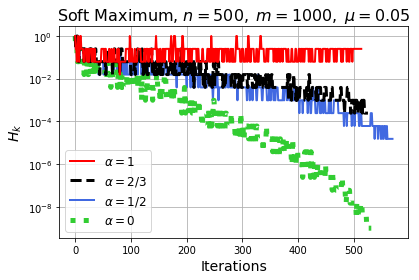

In [11]:
plt.plot(np.array(history_SN_1['H_k']), '-', 
         linewidth=2, label=r"$\alpha=1$", color='red', zorder=20)
plt.semilogy(np.array(history_SN_23['H_k']), '--', 
             linewidth=3, label=r"$\alpha=2/3$", color='black', zorder=10)
plt.semilogy(np.array(history_SN_12['H_k']), '-', 
             linewidth=2, label=r"$\alpha=1/2$", color='royalblue')
plt.semilogy(np.array(history_SN_0['H_k']), ':', 
             linewidth=5, label=r"$\alpha=0$", color='limegreen')

plt.legend(fontsize=12)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel(r"$H_k$", fontsize=14)
plt.title((r"Soft Maximum, $n = %d,\; m = %d, \; \mu = %.2f$" % (n, m, mu)), 
          fontsize=16)
plt.grid()
plt.tight_layout()